# KMeans with local expansion
___

In [20]:
from utils.utils import *
from utils.visualization import *
from utils.communities_network import *
from utils.iterative_greedy_algorithm import IG
from utils.kmeans import *
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from netgraph import Graph

import time

In [2]:
import warnings
warnings.filterwarnings("ignore")

## Test

### 1.Reel datasets

#### 1.1 Karate

In [23]:

file_path = 'data/reel/karate/karate.gml'
G = nx.read_gml(file_path, label='id')
original_nodes = list(G.nodes())
mapping = {node: i for i, node in enumerate(G.nodes())}
G = nx.relabel_nodes(G, mapping)
adj_matrix = nx.to_numpy_array(G)
true_labels = read_community_labels_file_reel(
    'data/reel/karate/groundTruth.txt')
print(f"The graph contains {adj_matrix.shape[0]} nodes.")

The graph contains 34 nodes.


In [24]:
start_time = time.time()
Cmax, Qmax, Kbest, Labels, trace = local_expansion_kmeans(
    G, adj_matrix, 2, 16)
end_time = time.time()


for item in trace:

    item["NMI"] = calc_nmi(true_labels, communities_to_labels(
        G, item["communities"], original_nodes))

duration = end_time - start_time
nmi = trace[Kbest-2]["NMI"]

print(f"Time elapsed : {duration} s ")
print(f"NMI = {nmi}")
print(f"Modularity = {Qmax}")
print(f"Number of communities : {Kbest}")
custom_df_styling(trace)

Iteration  0
M =  0
Unselected Nodes
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}
Cliques
[{'nodes': [0, 1, 17], 'weight': 0.6018518518518519}, {'nodes': [0, 1, 2, 3, 13], 'weight': 0.5041666666666667}, {'nodes': [0, 1, 2, 3, 7], 'weight': 0.4741666666666666}, {'nodes': [0, 1, 19], 'weight': 0.6574074074074074}, {'nodes': [0, 1, 21], 'weight': 0.6018518518518519}, {'nodes': [0, 4, 10], 'weight': 0.625}, {'nodes': [0, 4, 6], 'weight': 0.6666666666666666}, {'nodes': [0, 5, 10], 'weight': 0.6666666666666666}, {'nodes': [0, 5, 6], 'weight': 0.625}, {'nodes': [0, 8, 2], 'weight': 0.7208333333333332}, {'nodes': [0, 12, 3], 'weight': 0.6041666666666666}, {'nodes': [2, 32, 8], 'weight': 0.7277777777777779}, {'nodes': [5, 16, 6], 'weight': 0.5833333333333334}, {'nodes': [33, 32, 8, 30], 'weight': 0.5855392156862745}, {'nodes': [33, 32, 14], 'weight': 0.5727124183006536}, {'nodes': [33, 32, 15], 'weight': 0.5727124

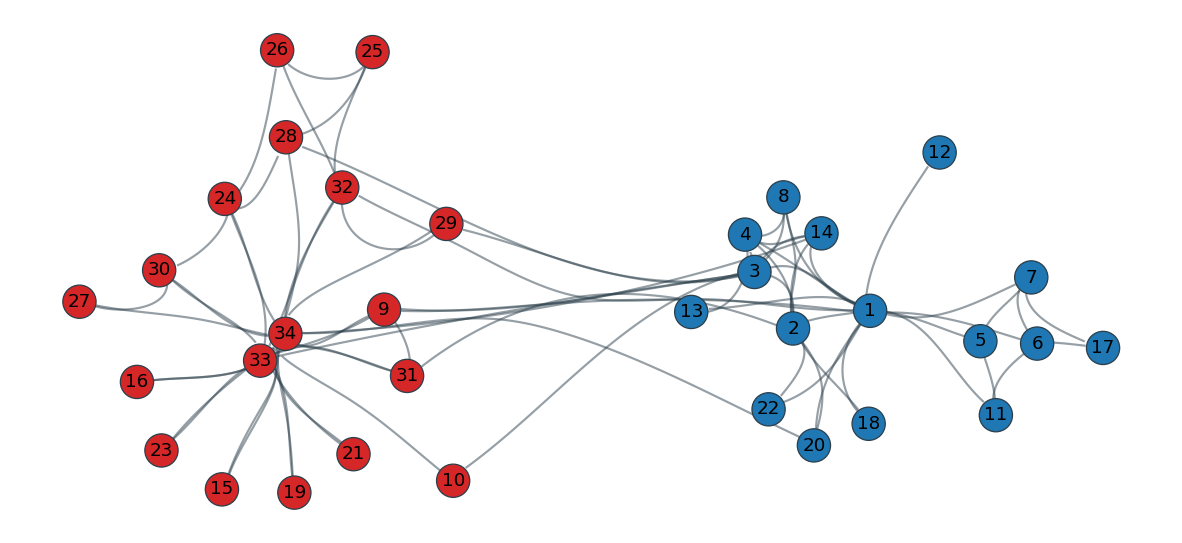

In [25]:
partion = {node-1: comm-1 for node,
           comm in communities_to_labels(G, Cmax, original_nodes)}
node_labels = {node: f"{node+1}" for node, comm in partion.items()}

community_to_color = {
    0: 'tab:blue',
    1: 'tab:red',
    2: 'tab:orange',
    3: 'tab:green',
    4: 'tab:pink',

}

node_color = {node: community_to_color[community_id]
              for node, community_id in partion.items()}



plt.figure(figsize=(15, 15))
Graph(
    G,
    node_color=node_color, node_edge_width=0.3, edge_alpha=.5, edge_width=.5,
    node_layout='community', node_layout_kwargs=dict(node_to_community=partion),
    edge_layout='bundled', edge_layout_kwargs=dict(k=2000), node_labels=node_labels, node_size=4, scale=(1.6, 1.6)
)
plt.show()

#### 1.2 Football

In [29]:

file_path = 'data/reel/football/football.gml'
G = nx.read_gml(file_path, label='id')
original_nodes = list(G.nodes())
mapping = {node: i for i, node in enumerate(G.nodes())}
G = nx.relabel_nodes(G, mapping)
adj_matrix = nx.to_numpy_array(G)
true_labels = read_community_labels_file_reel(
    'data/reel/football/groundTruth.txt')
print(f"The graph contains {adj_matrix.shape[0]} nodes.")

The graph contains 115 nodes.


In [30]:
start_time = time.time()
Cmax, Qmax, Kbest, Labels, trace = local_expansion_kmeans(
    G, adj_matrix, 2, 16 , alpha= .98, beta =1.02 )
end_time = time.time()


for item in trace:

    item["NMI"] = calc_nmi(true_labels, communities_to_labels(
        G, item["communities"], original_nodes))

duration = end_time - start_time
nmi = trace[Kbest-2]["NMI"]

print(f"Time elapsed : {duration} s ")
print(f"NMI = {nmi}")
print(f"Modularity = {Qmax}")
print(f"Number of communities : {Kbest}")
custom_df_styling(trace)

Iteration  0
M =  0
Unselected Nodes
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114}
Cliques
[{'nodes': [0, 1, 33], 'weight': 0.6972222222222223}, {'nodes': [0, 23, 90], 'weight': 0.7306397306397306}, {'nodes': [0, 23, 4, 104, 16, 9, 41, 93], 'weight': 0.4294642857142857}, {'nodes': [2, 64, 13, 106, 60], 'weight': 0.5174242424242423}, {'nodes': [2, 64, 13, 100], 'weight': 0.5404040404040403}, {'nodes': [2, 64, 6, 100, 47], 'weight': 0.5253787878787879}, {'nodes': [2, 64, 6, 60, 106], 'weight': 0.5253787878787879}, {'nodes': [2, 64, 6, 60, 47], 'weight': 0.5257575757575758}, {

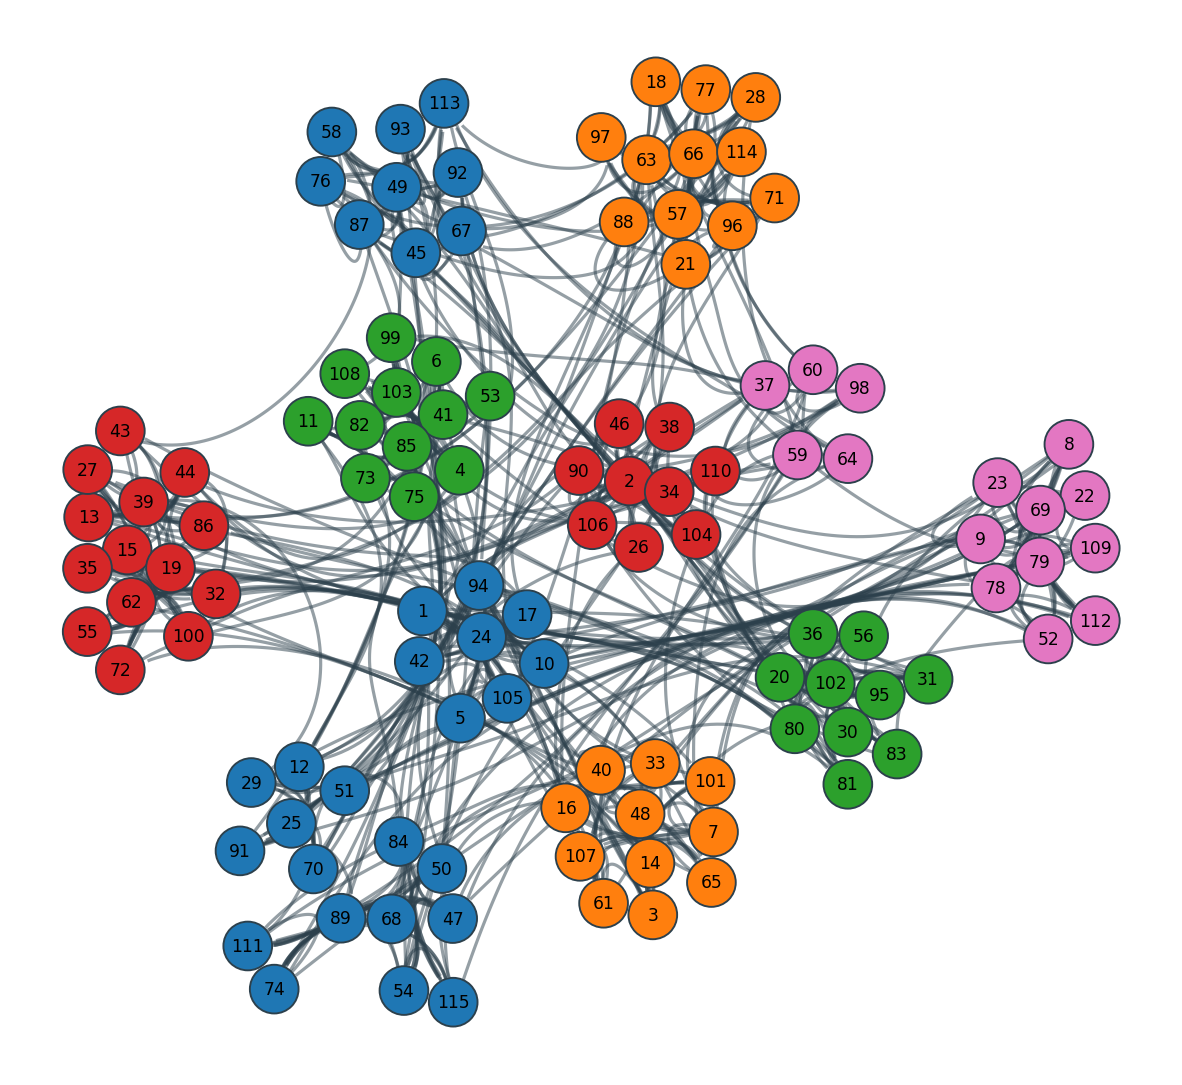

In [36]:
partion = {node: comm-1 for node,
           comm in communities_to_labels(G, Cmax, original_nodes)}
node_labels = {node: f"{node+1}" for node, comm in partion.items()}

community_to_color = {
    0: 'tab:blue',
    1: 'tab:red',
    2: 'tab:orange',
    3: 'tab:green',
    4: 'tab:pink',
    5: 'tab:blue',
    6: 'tab:red',
    7: 'tab:orange',
    8: 'tab:green',
    9: 'tab:pink',
    10: 'tab:blue',
    11: 'tab:red',
   
}

node_color = {node: community_to_color[community_id]
              for node, community_id in partion.items()}


plt.figure(figsize=(15, 15))
Graph(
    G,
    node_color=node_color, node_edge_width=0.3, edge_alpha=.5, edge_width=.5,
    node_layout='community', node_layout_kwargs=dict(node_to_community=partion),
    edge_layout='bundled', edge_layout_kwargs=dict(k=2000), node_labels=node_labels, node_size=4, scale=(1.6, 1.6)
)
plt.show()

#### 1.3 Dolphins

In [9]:

file_path = 'data/reel/dolphins/dolphins.gml'
G = nx.read_gml(file_path, label='id')
original_nodes = list(G.nodes())
mapping = {node: i for i, node in enumerate(G.nodes())}
G = nx.relabel_nodes(G, mapping)
adj_matrix = nx.to_numpy_array(G)
true_labels = read_community_labels_file_reel(
    'data/reel/dolphins/groundTruth.txt')
print(f"The graph contains {adj_matrix.shape[0]} nodes.")

The graph contains 62 nodes.


In [15]:
start_time = time.time()
Cmax, Qmax, Kbest, Labels, trace = local_expansion_kmeans(
    G, adj_matrix, 2, 16, alpha=.95, beta=1.05)
end_time = time.time()


for item in trace:

    item["NMI"] = calc_nmi(true_labels, communities_to_labels(
        G, item["communities"], original_nodes))

duration = end_time - start_time
nmi = trace[Kbest-2]["NMI"]

print(f"Time elapsed : {duration} s ")
print(f"NMI = {nmi}")
print(f"Modularity = {Qmax}")
print(f"Number of communities : {Kbest}")
custom_df_styling(trace)

Iteration  0
M =  0
Unselected Nodes
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61}
Cliques
[{'nodes': [1, 17, 27], 'weight': 0.7486111111111112}, {'nodes': [1, 54, 41], 'weight': 0.6851190476190476}, {'nodes': [1, 54, 19], 'weight': 0.7172619047619048}, {'nodes': [1, 26, 27], 'weight': 0.6375000000000001}, {'nodes': [2, 10, 42], 'weight': 0.6722222222222222}, {'nodes': [5, 9, 57, 13], 'weight': 0.4540343915343916}, {'nodes': [6, 13, 57, 9, 17], 'weight': 0.47648809523809527}, {'nodes': [6, 13, 57, 54], 'weight': 0.510085978835979}, {'nodes': [7, 19, 54], 'weight': 0.6619047619047619}, {'nodes': [7, 19, 30], 'weight': 0.7083333333333334}, {'nodes': [8, 28, 20], 'weight': 0.7888888888888889}, {'nodes': [8, 3, 59], 'weight': 0.7055555555555556}, {'nodes': [8, 45, 59], 'weight': 0.694949494949495}, {

### Datasets Synth

#### 2.1 LFR .15

In [37]:

file_path = 'data/synth/LFR/0.15/network.dat'
G = nx.read_edgelist(file_path, nodetype=int)
original_nodes = list(G.nodes())
mapping = {node: i for i, node in enumerate(G.nodes())}
G = nx.relabel_nodes(G, mapping)
adj_matrix = nx.to_numpy_array(G)
adj_matrix.shape[0]
true_communities = read_community_labels_file_synth(
    "data/synth/LFR/0.15/community.dat")

In [38]:
Cmax, Qmax, Kbest, Labels, trace = local_expansion_kmeans(G, adj_matrix, 2, 7)
for item in trace:
    item["NMI"] = calc_nmi(true_communities, communities_to_labels(
        G, item["communities"], original_nodes))


custom_df_styling(trace)

Iteration  0
M =  0
Unselected Nodes
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127}
Cliques
[{'nodes': [0, 3, 11, 9], 'weight': 0.6770833333333334}, {'nodes': [0, 3, 11, 14], 'weight': 0.6458333333333334}, {'nodes': [0, 3, 6, 14], 'weight': 0.6666666666666666}, {'nodes': [0, 4, 9, 11], 'weight': 0.6666666666666666}, {'nodes': [0, 4, 7, 15], 'weight': 0.6666666666666666}, {'nodes': [0, 6, 7, 15], 'weight': 0.6770833333333334}, {'nodes': [0, 8, 16, 5], 'weight': 0.6666666666666666}, {'nodes': [0, 8, 16, 15], 'wei

#### 2.2 LFR .40

In [39]:

file_path = 'data/synth/LFR/0.40/network.dat'
G = nx.read_edgelist(file_path, nodetype=int)
original_nodes = list(G.nodes())
mapping = {node: i for i, node in enumerate(G.nodes())}
G = nx.relabel_nodes(G, mapping)
adj_matrix = nx.to_numpy_array(G)
adj_matrix.shape[0]
true_communities = read_community_labels_file_synth(
    "data/synth/LFR/0.40/community.dat")

In [40]:
Cmax, Qmax, Kbest, Labels, trace = local_expansion_kmeans(G, adj_matrix, 2, 7)
for item in trace:
    item["NMI"] = calc_nmi(true_communities, communities_to_labels(
        G, item["communities"], original_nodes))


custom_df_styling(trace)

Iteration  0
M =  0
Unselected Nodes
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127}
Cliques
[{'nodes': [0, 1, 13], 'weight': 0.875}, {'nodes': [0, 1, 14], 'weight': 0.8541666666666666}, {'nodes': [0, 3, 8], 'weight': 0.8333333333333334}, {'nodes': [0, 3, 2], 'weight': 0.8541666666666666}, {'nodes': [0, 4, 8], 'weight': 0.8333333333333334}, {'nodes': [0, 4, 10], 'weight': 0.7708333333333334}, {'nodes': [0, 4, 15], 'weight': 0.8958333333333334}, {'nodes': [0, 7, 16, 5], 'weight': 0.8020833333333334}, {'nodes': [0